### Building a function "feat_info" to lookup deceptions from feature information file “lending_club_info.csv”

In [ ]:
## click me = 3

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('info.csv',index_col='LoanStatNew')

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('loan_status')

Current status of the loan


### Loading dataset

In [ ]:
## click me = 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('dataset.csv')

In [8]:
pwd

'C:\\Users\\80011\\Desktop\\_Jupyter\\_myGit\\TF_Classification_predict_loan_repayment_project1'

## Part 1: Exploratory Data Analysis
### Goal: in this part, we will take a closer look at our features, to examine their importance/relevance using different statistical and visualization methods

In [19]:
# list all features
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

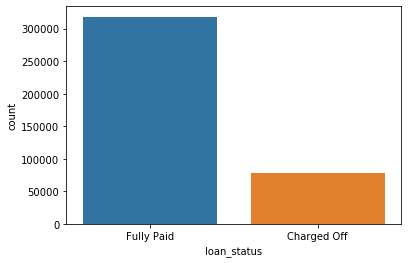

In [21]:
## Task: we'll explore 'loan_status' to see how our data labels are balanced. 
sns.countplot(x='loan_status',data=df)

In [ ]:
## Analysis: clearly, the labels are imbalanced. This can impact accuracy results during evaluation.

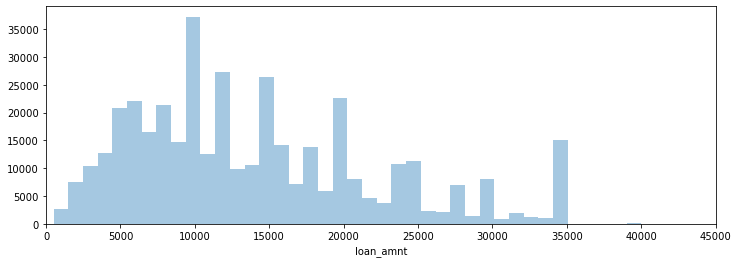

In [22]:
## Task: we'll explore 'loan_amnt' by creating a histogram on that column. 
plt.figure(figsize=(12,4))
plt.xlim(0,45000)
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [23]:
## Analysis: spikes indicate that there are certain amounts that are standard loans.

In [24]:
## Task: explore the correlation between continuous variable. Then we’ll visualize this using heatmap.
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

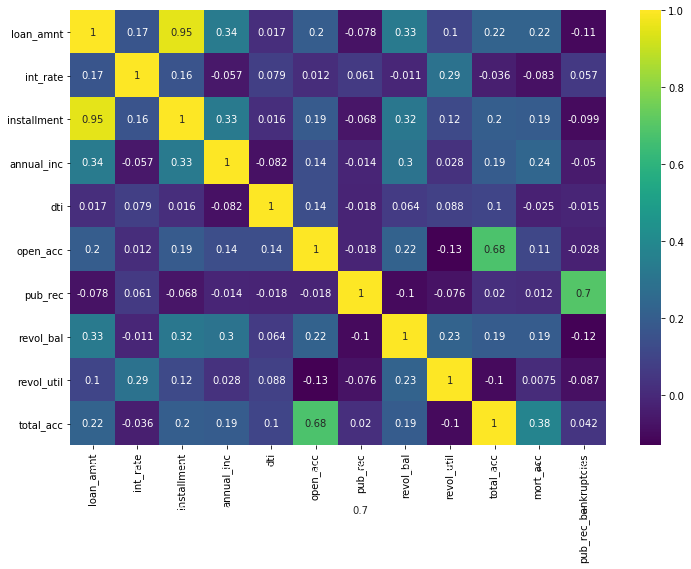

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = "viridis", annot=True, fmt='.2g').set_ylim(10 ,0)

In [26]:
## Task: we’ll further explore features that have high correlation in order to prevent data leakage. 
# From above task, we found that 'installment' is correlated with 'loan_amnt'.
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [27]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


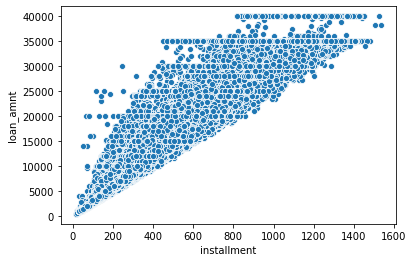

In [28]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

In [29]:
## Analysis: from above scatter plot, we can confirm this high correlation. 

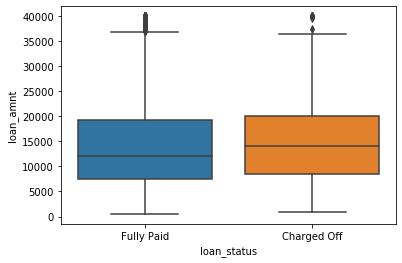

In [30]:
## Task: to explore the correlation between 'loan_status' and 'loan_amnt'. This step can answer the question: is there a 
# relationship between expensive loans and not being able to pay them off, or low amount loans and then fully paying those off?
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [31]:
## Analysis: if our loan amount is higher, we have a slight increase in the likelihood of it being charged off. However, this 
# is not a key indicator of whether or not someone's going to pay off their loan.

In [33]:
## Task: we’ll further explore the above relationship between 'loan_status' and 'loan_amnt' using summary statistics.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [35]:
## Analysis: quantitative numbers using summary statistics is easier to read than the boxplot visualization above.

In [9]:
## Task: explore 'grade' and 'sub_grade' features to identify the unique grades and subgrades.
grd = sorted(df['grade'].unique())
grd

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [10]:
subgrd = sorted(df['sub_grade'].unique())
subgrd

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [11]:
## Analysis: the sub grades contain the information of the actual grade (duplicate data)

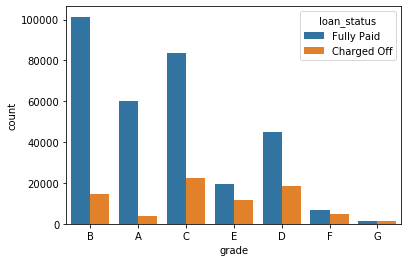

In [12]:
## Task: we’ll further explore 'grade' feature using countplot, to study if there is a difference between fully paying off 
# the loan vs having it be charged off, based off the grade feature
sns.countplot(x='grade',data=df,hue='loan_status')

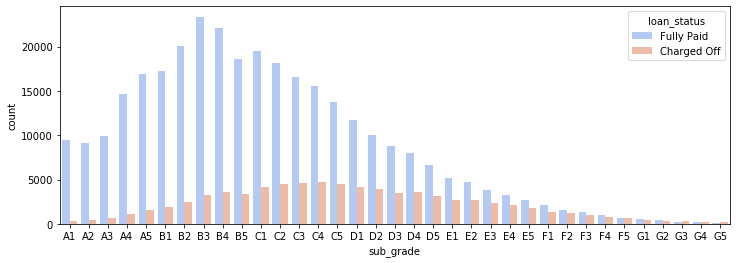

In [15]:
## Task: we’ll do the same task above using 'sub_grade' this time
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order=subgrd,hue="loan_status",palette="coolwarm")

In [14]:
## Analysis: the majorities of loans are given to customers in grade A,B and C. Other grades are riskier loans because 
# they're more likely to be charged off. In contrast, for F and G subgrades, it looks like the “charged off rate” is 
# almost the same as the “fully paid rate”.

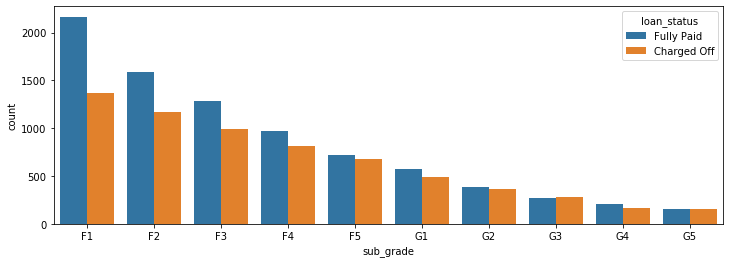

In [17]:
## Task: from above task, we want to isolate (F & G) to investigate if it's even worth giving loans to people in these 
dffg = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
dffgunq = sorted(dffg['sub_grade'].unique())
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=dffg,order=dffgunq,hue="loan_status")

In [18]:
## Analysis: only customers graded G3 and G5 have the likelihood of defaulting higher than fully paying off the loan

In [20]:
## click me

In [6]:
## Task: create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it 
# was "Charged Off".
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


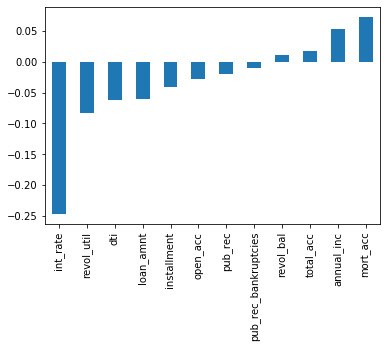

In [21]:
## Task: create a bar plot showing the correlation between the label we've created 'loan_repaid' and other numeric features
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

In [22]:
## Analysis: the interest rate has the highest negative correlation with the customer ability to repay their loan. So, if you 
# have an extremely high interest rate, you're going to find it harder to pay off that loan.

## Part 2: Data Preprocessing

### goal: to deal with: missing data, repetitive features and categorical features.

In [23]:
## Task: what is the length of the dataframe?
len(df)

396030

In [24]:
## Task: identify the total count of missing values per column.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [25]:
## Analysis: we are missing data in the following features: emp_title, emp_length, title, revol_util, mort_acc
# and pub_rec_bankruptcies

In [7]:
## Task: convert missing values into percentage of the total data frame
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [7]:
## Analysis: the column that we need to focus on is “mort_acc” because we can't drop 10% of our data. On the other hand, 
# we can drop samples from columns with minor missing data like ‘revol_util’ and ‘pub_rec_bankruptcies’ witch is missing 
# only less than 0.2%. So, it should be fine to drop them!

In [7]:
## Task: now we’ll examine emp_title and emp_length to see whether it will be okay to drop them.
feat_info('emp_title')
print()
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [8]:
## Task: identify unique employment job titles are there?
df['emp_title'].nunique()

173105

In [11]:
## Analysis: this will help us decide is we’re going to drop employment title or fill it. There's almost half of data 
# are all unique employment titles.

In [10]:
## Task: explore possible categories within this feature?
df['emp_title'].value_counts()

Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
PBM&M                              1
Manager of Maintenance             1
Xtreme Automotive Group, Inc       1
Manager of IT Infrastructure       1
Integrity Staffing                 1
Name: emp_title, Length: 173105, dtype: int64

In [12]:
## Analysis: there are way too many titles to convert this to dummy variables. So, we'll drop this column instead.

In [13]:
## Task: remove emp_title column
df = df.drop('emp_title',axis=1)

In [16]:
## Task: visualize different categories in the emp_length feature.

In [14]:
emplen = sorted(df['emp_length'].unique().astype(str))
emplen

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'nan']

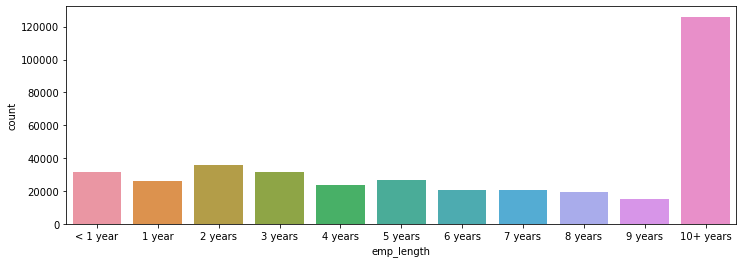

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

In [17]:
## Analysis: people that have been working more than 10 years, have the highest loan approval rate.

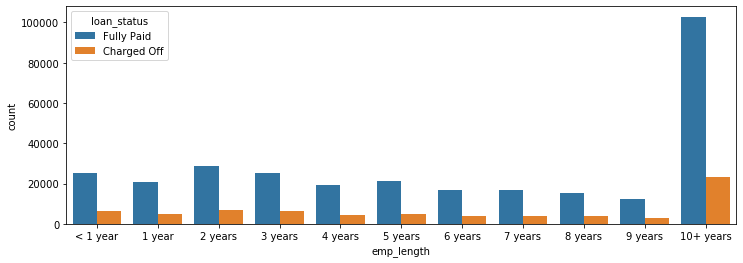

In [18]:
## Task: visualize repayment status (paid vs charged off) based on employment years
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,hue='loan_status',order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

In [19]:
## Analysis: the ratio between paid vs charged off is the same across all employment length categories. This means that this 
# feature isn't a very informative feature. We need to further confirm this quantitatively below.

In [21]:
## Task: since above visualization is not concrete enough. We need to quantitatively explore ratio between paid vs charged off. 
# Our goal is to identify the percentage of people per employment category didn't pay back their loan.
loanstatus_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
loanstatus_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [22]:
co_cat = loanstatus_co/loanstatus_fp
co_cat

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

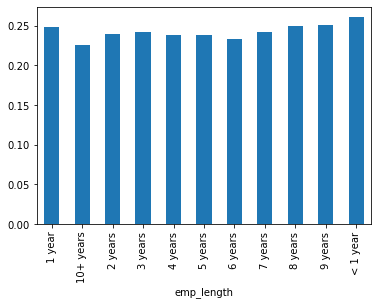

In [23]:
co_cat.plot(kind='bar')

In [24]:
## Analysis: since all these bars are similar in height, then there isn't that much information from employment length feature.
# So, we can drop this column.

In [25]:
## Task: drop 'emp_length' column
df = df.drop('emp_length',axis=1)

In [26]:
## Task: explore the DataFrame to identify remaining features that still have missing data.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
## Task: explore the 'title' vs 'purpose' column to identify if they are duplicate data
df[['title','purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


In [28]:
## Analysis: ‘title’ is a subcategory of ‘purpose’ column. So, we’ll drop the title column.

In [29]:
## Task: drop the title column.
df = df.drop('title',axis=1)

In [30]:
## Task: explore the ‘mort_acc’ feature
feat_info('mort_acc')

Number of mortgage accounts.


In [31]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
## Analysis: this column have 10% (37795/396030) of missing data. So, we can’t drop missing samples within this column. 
# As a result, we are only left with two options: drop the column itself or fill the missing values.

In [34]:
## Task: explore other columns correlation with 'mort_acc'
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [35]:
## Analysis: ‘total_acc’ corrolates (38%) with ‘mort_acc’. Although this is not a duplicate data, but it have positive 
# correlation. So, we can use ‘total_acc’ to fill ‘mort_acc’

In [37]:
## Task: use the mean of ‘total_acc’ to fill ‘mort_acc’

In [38]:
## click me = 3

In [7]:
mort_mean = df.groupby('total_acc').mean()['mort_acc']
mort_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [8]:
def mortacc_imp(mort_acc,total_acc):
    if np.isnan(mort_acc):
        return mort_mean[total_acc]
    else:
        return mort_acc

In [9]:
df['mort_acc'] = df[['mort_acc','total_acc']].apply(lambda df:mortacc_imp(df['mort_acc'],df['total_acc']),axis=1)

In [42]:
## Task: identify remaining features that still have missing data.
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [43]:
## Analysis: we are left with only two features ‘revol_util’ and ‘pub_rec_bankruptcies’. Both have few hundred missing data. 
# So, we can drop the missing samples in both columns (below).

In [44]:
## Task: drop the remaining missing samples
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [45]:
## Analysis: we have no more missing data. Now we can deal with categorical data.

In [10]:
## Task: identify columns with non-numeric data
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [11]:
## Analysis: we need to go through all these categorical features and deal with them either by dropping or converting 
# them to dummy variables.

In [12]:
## Task: deal with the ‘term’ feature 
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [13]:
## click me

In [14]:
term_map = {' 36 months':36,' 60 months':60}
df['term'] = df['term'].map(term_map)
df['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

In [15]:
## Analysis: this is a binary column. Since there is a numeric relationship (time) between 36 and 60, I decided to 
# converte it to: 36 or 60 integer data type

In [ ]:
## click me

In [16]:
## Task: we already know ‘grade’ is part of ‘sub_grade’, so we’ll just drop the grade feature.
df = df.drop('grade',axis=1)

In [ ]:
## click me

In [17]:
## Task: deal with the 'sub_grade' feature 
sub_grade_hot = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df,sub_grade_hot],axis=1)
df = df.drop('sub_grade',axis=1)

In [18]:
## Analysis: above I’ve converted ‘subgrade’ into dummy variables. Then concatenate the new columns to the original DataFrames. 
# I also dropped the original subgrade column.

In [19]:
## click me

In [20]:
## Task: deal with the following features: verification_status, application_type, initial_list_status, purpose.
mydumm = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
df = pd.concat([df,mydumm],axis=1)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

In [21]:
## Analysis: I’ve converted above features into dummy variables.

In [22]:
## Task: deal with the 'home_ownership' feature
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [23]:
## Analysis: most people are in either three categories: ‘Mortgage’, ‘Rent’ or ‘Own’. Very few are : ‘Other’, ‘None’ or ‘Any’. 
# So, below we will combine these three categories in the ‘Other’ category. This will reduce the number of generated 
# dummy columns.

In [24]:
## click me

In [25]:
## Task: combine the following categories: ‘Other’, ‘None’ or ‘Any’. Then convert 'home_ownership' feature into dummy variables.
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [ ]:
## click me

In [26]:
## Task: deal with the 'address' feature. 
df['zip_code'] = df['address'].apply(lambda x:x[-5:])

In [27]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 396030, dtype: object

In [28]:
## Analysis: We feature engineered a zip code column from the address in the data set. Then we created a column 
# called 'zip_code' that extracts the zip code from the address column. Next, we need to convert zip_code column into 
# dummy variables.

In [ ]:
## click me

In [29]:
## Task: convert 'zip_code' column into dummy variables.
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [31]:
## Task: deal with the ‘issue_d’ feature.
feat_info('issue_d')

The month which the loan was funded


In [ ]:
## click me

In [30]:
df = df.drop('issue_d',axis=1)

In [32]:
## Analysis: since ‘issue_d’ feature is “The month which the loan was funded”. This assumes the loan is approved. 
# This means for new data, this detail will not be available. So this is a data leakage, and we need to drop it.

In [33]:
## Task: deal with the ‘earliest_cr_line’ feature.
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [34]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [ ]:
## click me = 2

In [35]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line']

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 396030, dtype: datetime64[ns]

In [36]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:date.year)
df = df.drop('earliest_cr_line',axis=1)

In [38]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 396030, dtype: int64

In [37]:
## Analysis: this is a historical time stamp feature. We’ve converted the data into data-time object. Next, we’ve extracted 
# the year from this feature using a .apply function. Then we’ve converted it to a numeric feature.

### Train/Test/Split